___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [8]:
df[["Exited", "IsActiveMember"]].value_counts()

Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


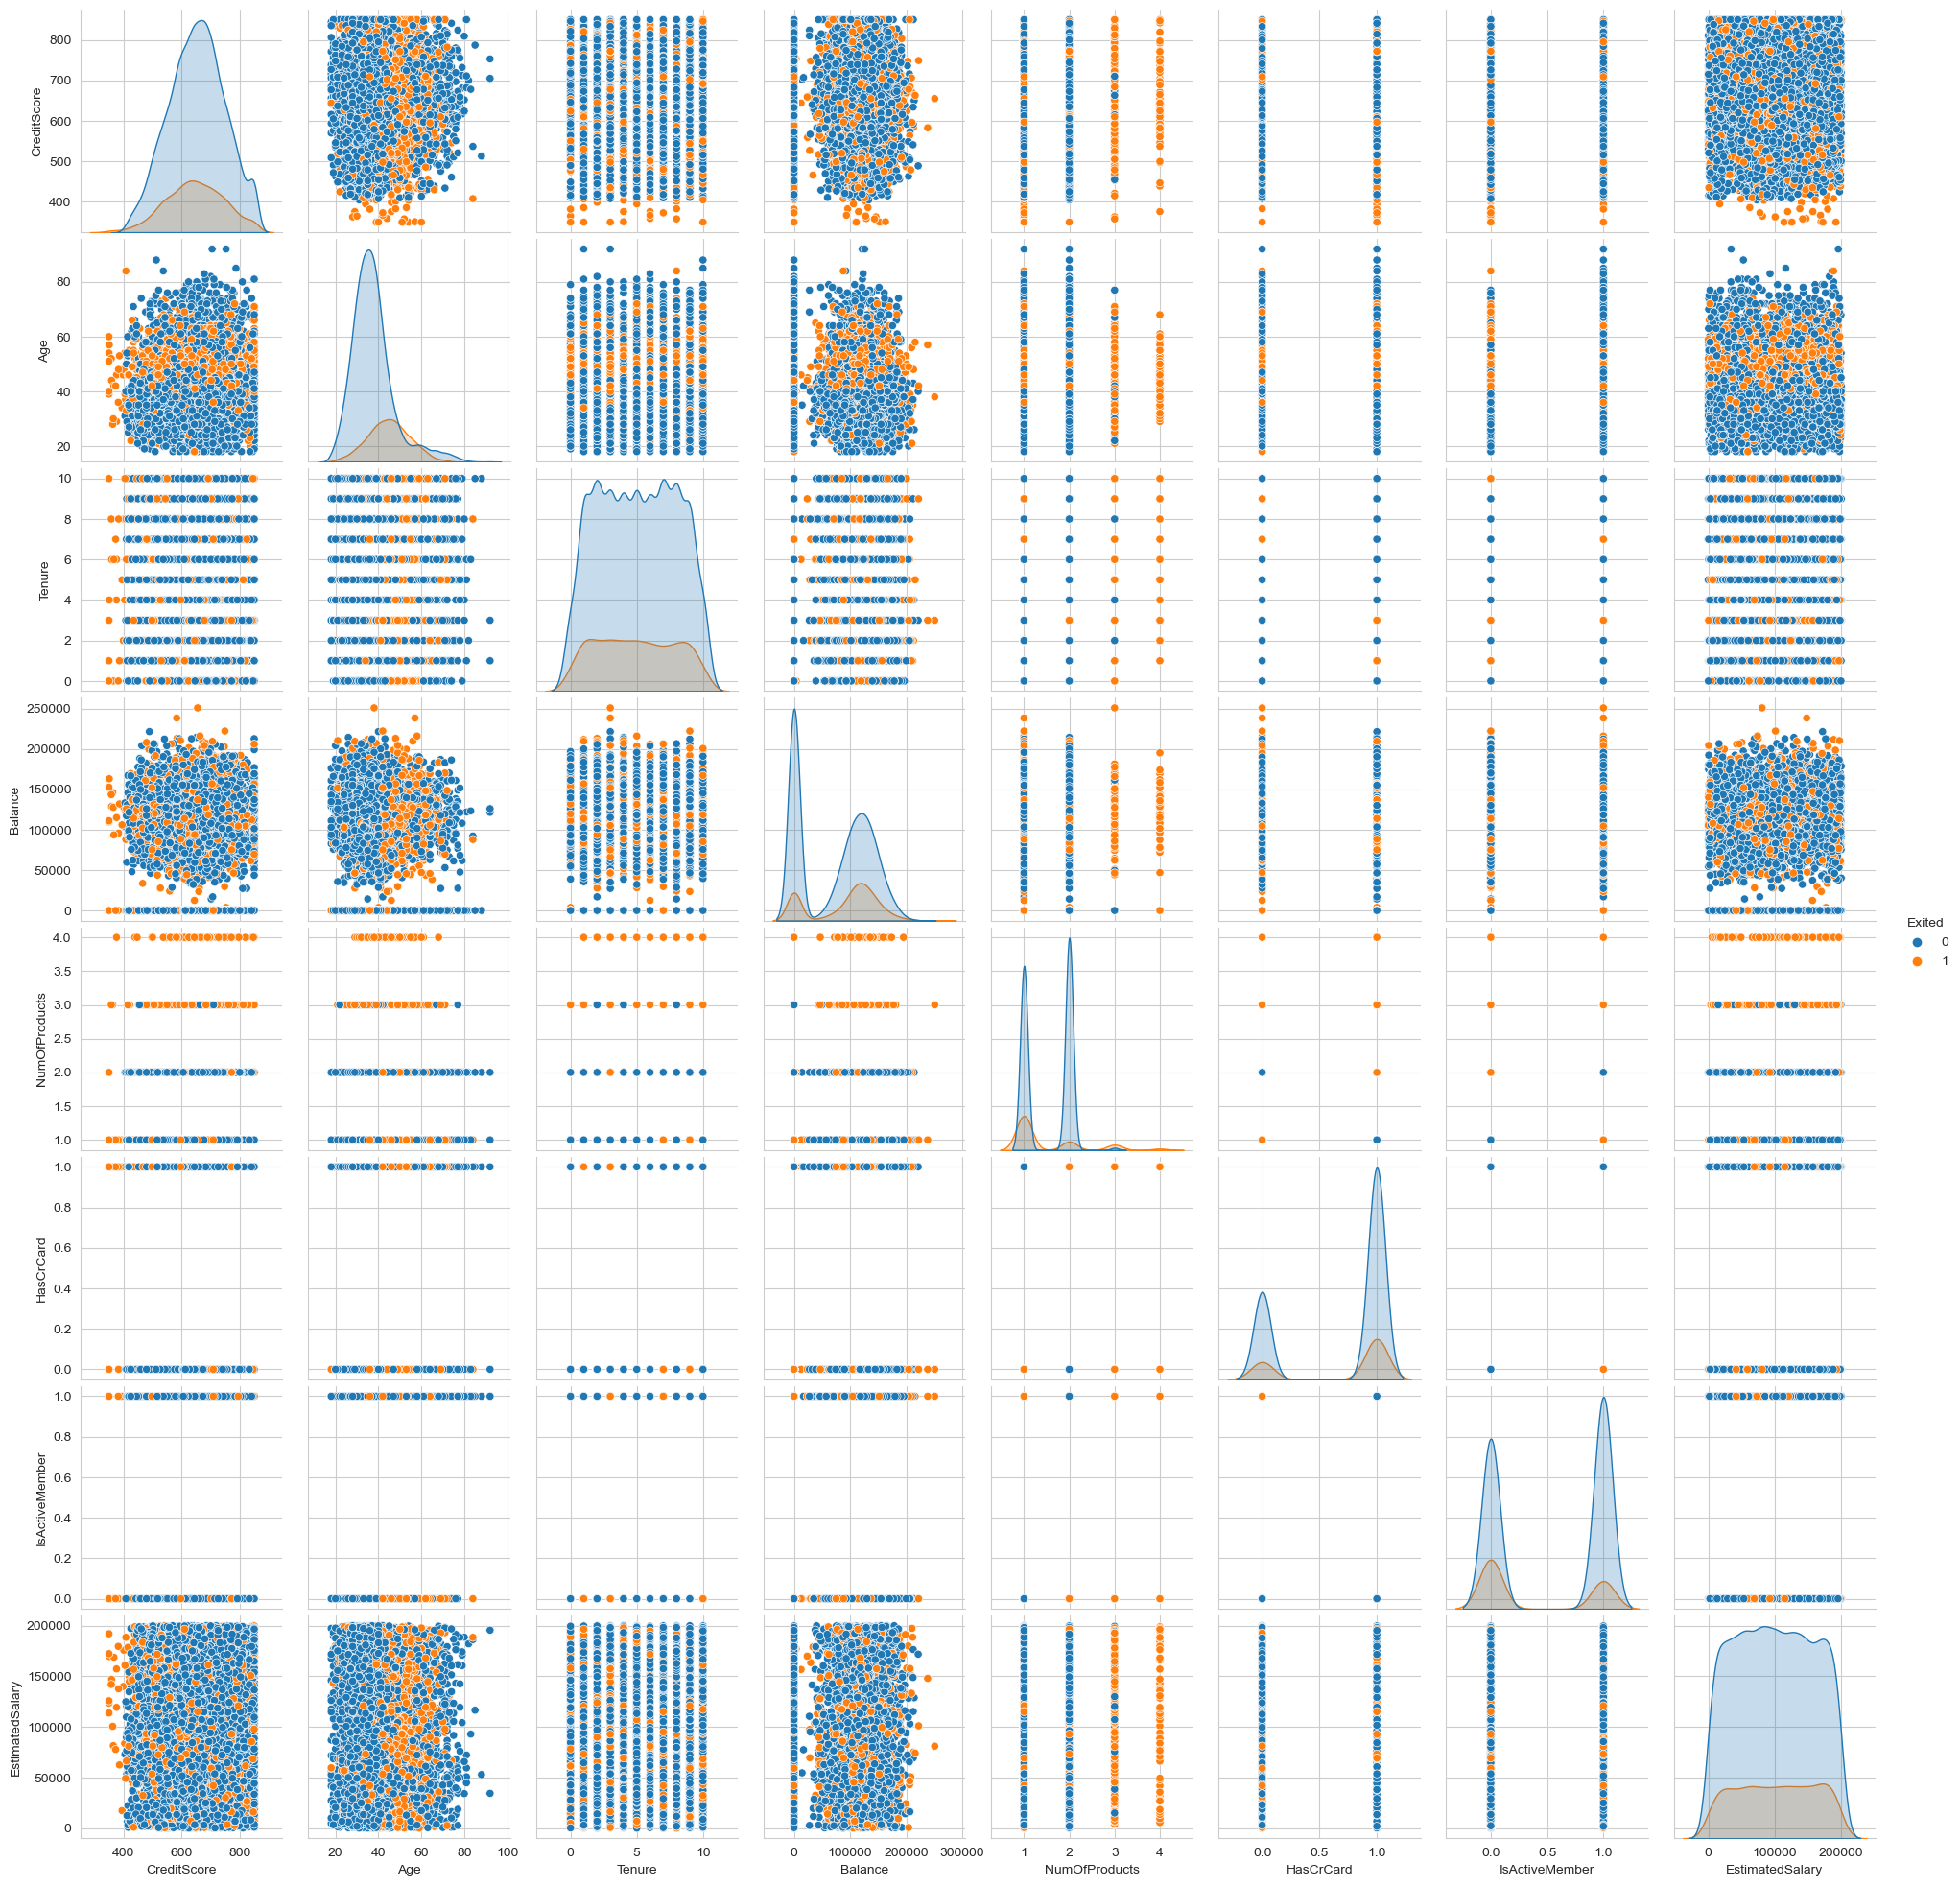

In [10]:
sns.pairplot(df, hue="Exited");

In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

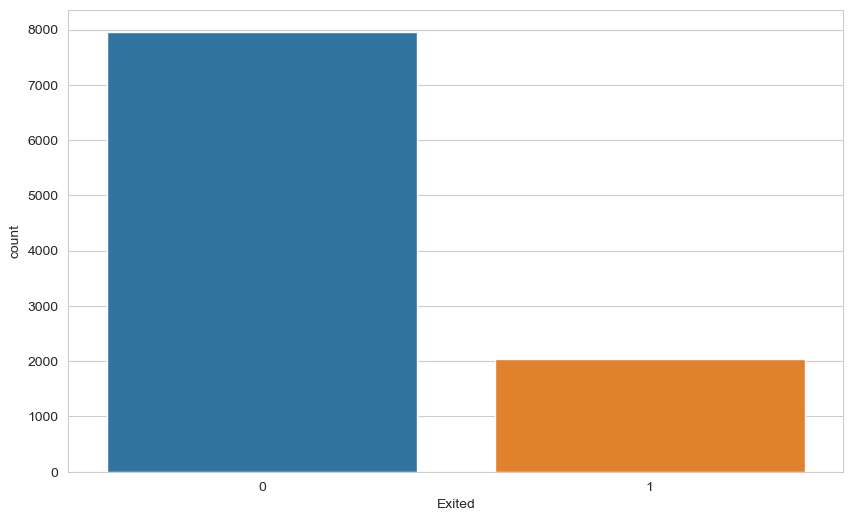

In [12]:
sns.countplot(df["Exited"])
plt.show()

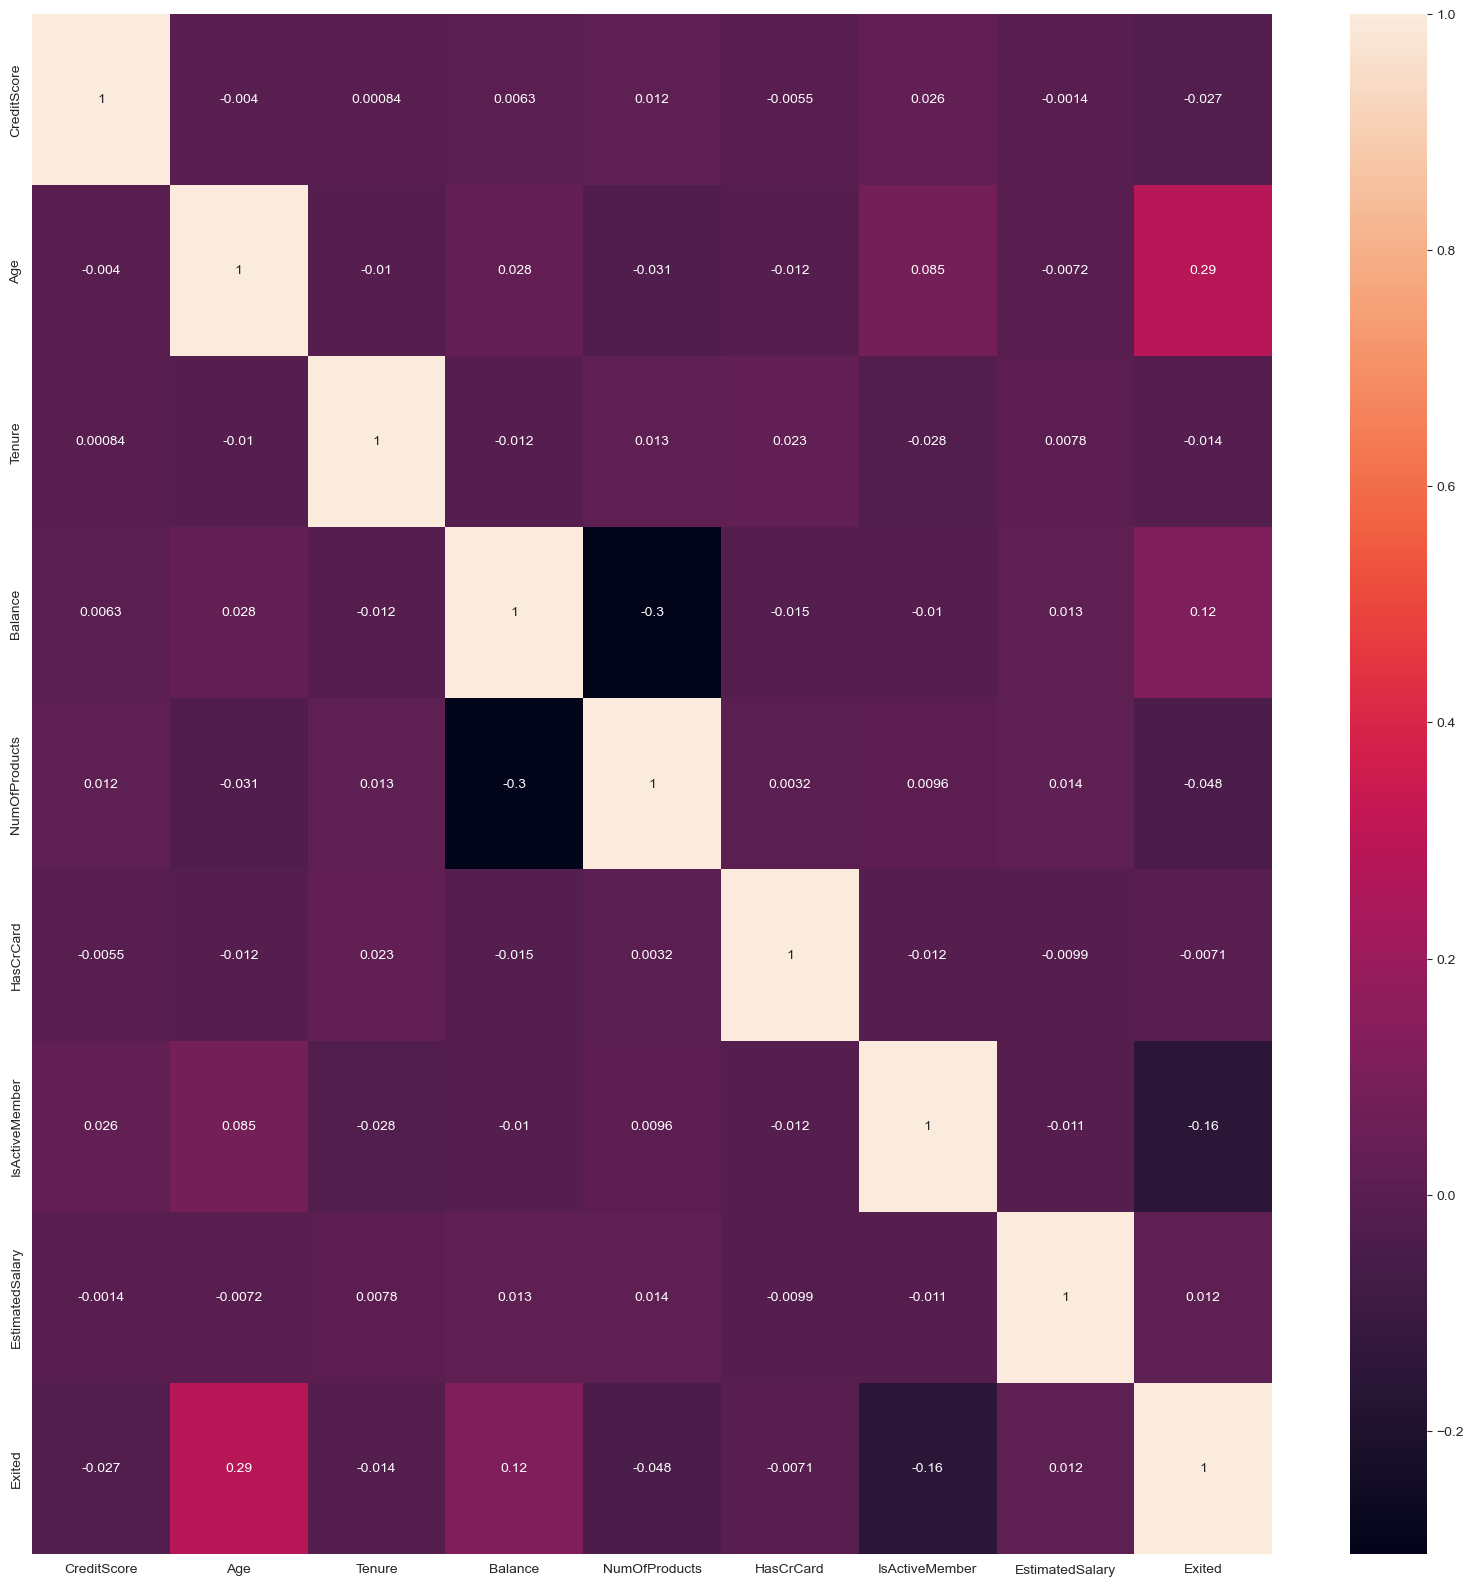

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

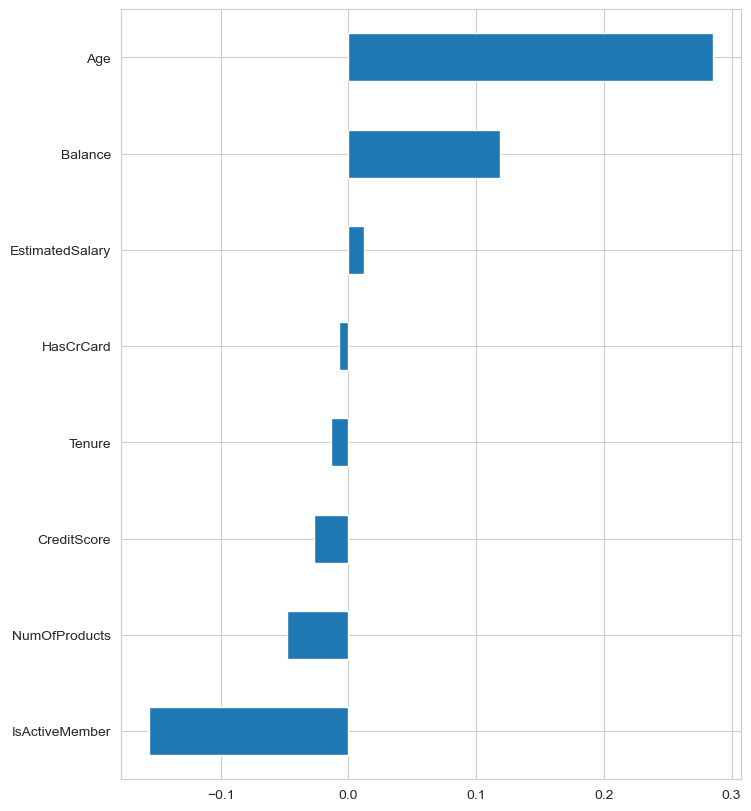

In [14]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh")
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [16]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [17]:
seed = 42

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [19]:
cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [20]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [23]:
X_train.shape

(7000, 13)

In [24]:
X_test.shape

(3000, 13)

In [25]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [26]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 1000, verbose=1)

Epoch 1/1000
50/50 [==============================] - 1s 6ms/step - loss: 0.6293 - accuracy: 0.6668 - val_loss: 0.5397 - val_accuracy: 0.7871
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.7973 - val_loss: 0.5054 - val_accuracy: 0.7871
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4891 - accuracy: 0.7973 - val_loss: 0.4946 - val_accuracy: 0.7871
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7973 - val_loss: 0.4852 - val_accuracy: 0.7871
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7973 - val_loss: 0.4786 - val_accuracy: 0.7871
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7973 - val_loss: 0.4721 - val_accuracy: 0.7871
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.7973 - val_loss: 0.4678 - val_accuracy: 0.7871
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8522 - val_loss: 0.3663 - val_accuracy: 0.8386
Epoch 59/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8552 - val_loss: 0.3667 - val_accuracy: 0.8414
Epoch 60/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8533 - val_loss: 0.3673 - val_accuracy: 0.8414
Epoch 61/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.8544 - val_loss: 0.3680 - val_accuracy: 0.8400
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8546 - val_loss: 0.3667 - val_accuracy: 0.8429
Epoch 63/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8521 - val_loss: 0.3644 - val_accuracy: 0.8400
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8548 - val_loss: 0.3666 - val_accuracy: 0.8400
Epoch 65/1000

50/50 [==============================] - 0s 3ms/step - loss: 0.3453 - accuracy: 0.8583 - val_loss: 0.3651 - val_accuracy: 0.8414
Epoch 116/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8552 - val_loss: 0.3632 - val_accuracy: 0.8400
Epoch 117/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8597 - val_loss: 0.3637 - val_accuracy: 0.8400
Epoch 118/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3459 - accuracy: 0.8586 - val_loss: 0.3619 - val_accuracy: 0.8400
Epoch 119/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8563 - val_loss: 0.3626 - val_accuracy: 0.8414
Epoch 120/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3445 - accuracy: 0.8575 - val_loss: 0.3636 - val_accuracy: 0.8400
Epoch 121/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8560 - val_loss: 0.3632 - val_accuracy: 0.8400
Epoch 1

Epoch 172/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3391 - accuracy: 0.8586 - val_loss: 0.3569 - val_accuracy: 0.8457
Epoch 173/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3385 - accuracy: 0.8614 - val_loss: 0.3584 - val_accuracy: 0.8500
Epoch 174/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8586 - val_loss: 0.3590 - val_accuracy: 0.8500
Epoch 175/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8587 - val_loss: 0.3626 - val_accuracy: 0.8471
Epoch 176/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8608 - val_loss: 0.3604 - val_accuracy: 0.8471
Epoch 177/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.8592 - val_loss: 0.3581 - val_accuracy: 0.8471
Epoch 178/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8594 - val_loss: 0.3586 - val_accuracy:

Epoch 229/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3338 - accuracy: 0.8616 - val_loss: 0.3588 - val_accuracy: 0.8429
Epoch 230/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8627 - val_loss: 0.3578 - val_accuracy: 0.8457
Epoch 231/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8643 - val_loss: 0.3597 - val_accuracy: 0.8400
Epoch 232/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8624 - val_loss: 0.3574 - val_accuracy: 0.8443
Epoch 233/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3341 - accuracy: 0.8611 - val_loss: 0.3590 - val_accuracy: 0.8443
Epoch 234/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3336 - accuracy: 0.8617 - val_loss: 0.3582 - val_accuracy: 0.8429
Epoch 235/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8629 - val_loss: 0.3612 - val_accuracy:

Epoch 286/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.8640 - val_loss: 0.3685 - val_accuracy: 0.8371
Epoch 287/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3300 - accuracy: 0.8633 - val_loss: 0.3603 - val_accuracy: 0.8414
Epoch 288/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3286 - accuracy: 0.8646 - val_loss: 0.3590 - val_accuracy: 0.8457
Epoch 289/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8659 - val_loss: 0.3608 - val_accuracy: 0.8457
Epoch 290/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8622 - val_loss: 0.3586 - val_accuracy: 0.8443
Epoch 291/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.8652 - val_loss: 0.3591 - val_accuracy: 0.8386
Epoch 292/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8649 - val_loss: 0.3609 - val_accuracy:

Epoch 343/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8635 - val_loss: 0.3637 - val_accuracy: 0.8429
Epoch 344/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8656 - val_loss: 0.3606 - val_accuracy: 0.8457
Epoch 345/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8663 - val_loss: 0.3647 - val_accuracy: 0.8414
Epoch 346/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8659 - val_loss: 0.3633 - val_accuracy: 0.8429
Epoch 347/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8660 - val_loss: 0.3592 - val_accuracy: 0.8429
Epoch 348/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8665 - val_loss: 0.3646 - val_accuracy: 0.8443
Epoch 349/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8684 - val_loss: 0.3612 - val_accuracy:

Epoch 400/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.8670 - val_loss: 0.3681 - val_accuracy: 0.8400
Epoch 401/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3200 - accuracy: 0.8687 - val_loss: 0.3660 - val_accuracy: 0.8386
Epoch 402/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3199 - accuracy: 0.8678 - val_loss: 0.3632 - val_accuracy: 0.8400
Epoch 403/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3200 - accuracy: 0.8681 - val_loss: 0.3646 - val_accuracy: 0.8400
Epoch 404/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8686 - val_loss: 0.3660 - val_accuracy: 0.8371
Epoch 405/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.8681 - val_loss: 0.3661 - val_accuracy: 0.8371
Epoch 406/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8681 - val_loss: 0.3676 - val_accuracy:

Epoch 457/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8695 - val_loss: 0.3711 - val_accuracy: 0.8343
Epoch 458/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8687 - val_loss: 0.3670 - val_accuracy: 0.8371
Epoch 459/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3183 - accuracy: 0.8687 - val_loss: 0.3671 - val_accuracy: 0.8343
Epoch 460/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3183 - accuracy: 0.8678 - val_loss: 0.3658 - val_accuracy: 0.8371
Epoch 461/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8670 - val_loss: 0.3643 - val_accuracy: 0.8371
Epoch 462/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8713 - val_loss: 0.3676 - val_accuracy: 0.8357
Epoch 463/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8676 - val_loss: 0.3679 - val_accuracy:

Epoch 514/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8679 - val_loss: 0.3695 - val_accuracy: 0.8414
Epoch 515/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8713 - val_loss: 0.3713 - val_accuracy: 0.8371
Epoch 516/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3191 - accuracy: 0.8694 - val_loss: 0.3725 - val_accuracy: 0.8357
Epoch 517/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8689 - val_loss: 0.3724 - val_accuracy: 0.8400
Epoch 518/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8710 - val_loss: 0.3726 - val_accuracy: 0.8429
Epoch 519/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 0.8694 - val_loss: 0.3689 - val_accuracy: 0.8357
Epoch 520/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8713 - val_loss: 0.3706 - val_accuracy:

Epoch 571/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8700 - val_loss: 0.3678 - val_accuracy: 0.8429
Epoch 572/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8700 - val_loss: 0.3756 - val_accuracy: 0.8400
Epoch 573/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8724 - val_loss: 0.3690 - val_accuracy: 0.8429
Epoch 574/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8703 - val_loss: 0.3718 - val_accuracy: 0.8429
Epoch 575/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8711 - val_loss: 0.3724 - val_accuracy: 0.8443
Epoch 576/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8698 - val_loss: 0.3672 - val_accuracy: 0.8400
Epoch 577/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8683 - val_loss: 0.3687 - val_accuracy:

Epoch 628/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8724 - val_loss: 0.3718 - val_accuracy: 0.8443
Epoch 629/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8717 - val_loss: 0.3679 - val_accuracy: 0.8471
Epoch 630/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8717 - val_loss: 0.3729 - val_accuracy: 0.8429
Epoch 631/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8698 - val_loss: 0.3710 - val_accuracy: 0.8429
Epoch 632/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8727 - val_loss: 0.3712 - val_accuracy: 0.8471
Epoch 633/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8702 - val_loss: 0.3676 - val_accuracy: 0.8414
Epoch 634/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8706 - val_loss: 0.3691 - val_accuracy:

Epoch 685/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8694 - val_loss: 0.3665 - val_accuracy: 0.8471
Epoch 686/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8713 - val_loss: 0.3685 - val_accuracy: 0.8400
Epoch 687/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8706 - val_loss: 0.3712 - val_accuracy: 0.8400
Epoch 688/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8690 - val_loss: 0.3766 - val_accuracy: 0.8471
Epoch 689/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8700 - val_loss: 0.3686 - val_accuracy: 0.8371
Epoch 690/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8690 - val_loss: 0.3721 - val_accuracy: 0.8443
Epoch 691/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.8721 - val_loss: 0.3659 - val_accuracy:

Epoch 742/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8716 - val_loss: 0.3670 - val_accuracy: 0.8386
Epoch 743/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8721 - val_loss: 0.3721 - val_accuracy: 0.8514
Epoch 744/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8716 - val_loss: 0.3732 - val_accuracy: 0.8471
Epoch 745/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8705 - val_loss: 0.3815 - val_accuracy: 0.8400
Epoch 746/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.8702 - val_loss: 0.3702 - val_accuracy: 0.8471
Epoch 747/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8732 - val_loss: 0.3682 - val_accuracy: 0.8457
Epoch 748/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8697 - val_loss: 0.3639 - val_accuracy:

Epoch 799/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8716 - val_loss: 0.3826 - val_accuracy: 0.8429
Epoch 800/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 0.8724 - val_loss: 0.3721 - val_accuracy: 0.8414
Epoch 801/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 0.8708 - val_loss: 0.3706 - val_accuracy: 0.8471
Epoch 802/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8705 - val_loss: 0.3730 - val_accuracy: 0.8386
Epoch 803/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8738 - val_loss: 0.3730 - val_accuracy: 0.8471
Epoch 804/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8713 - val_loss: 0.3694 - val_accuracy: 0.8414
Epoch 805/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8713 - val_loss: 0.3751 - val_accuracy:

Epoch 856/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3095 - accuracy: 0.8713 - val_loss: 0.3703 - val_accuracy: 0.8486
Epoch 857/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8708 - val_loss: 0.3794 - val_accuracy: 0.8386
Epoch 858/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.8706 - val_loss: 0.3667 - val_accuracy: 0.8500
Epoch 859/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8703 - val_loss: 0.3699 - val_accuracy: 0.8486
Epoch 860/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8702 - val_loss: 0.3688 - val_accuracy: 0.8514
Epoch 861/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8716 - val_loss: 0.3731 - val_accuracy: 0.8386
Epoch 862/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8740 - val_loss: 0.3719 - val_accuracy:

Epoch 913/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.8722 - val_loss: 0.3728 - val_accuracy: 0.8357
Epoch 914/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3081 - accuracy: 0.8740 - val_loss: 0.3739 - val_accuracy: 0.8357
Epoch 915/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8713 - val_loss: 0.3708 - val_accuracy: 0.8371
Epoch 916/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.8729 - val_loss: 0.3825 - val_accuracy: 0.8371
Epoch 917/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8727 - val_loss: 0.3782 - val_accuracy: 0.8414
Epoch 918/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.8716 - val_loss: 0.3704 - val_accuracy: 0.8443
Epoch 919/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8748 - val_loss: 0.3692 - val_accuracy:

Epoch 970/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8721 - val_loss: 0.3842 - val_accuracy: 0.8414
Epoch 971/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8748 - val_loss: 0.3810 - val_accuracy: 0.8443
Epoch 972/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8730 - val_loss: 0.3805 - val_accuracy: 0.8371
Epoch 973/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8705 - val_loss: 0.3695 - val_accuracy: 0.8414
Epoch 974/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8710 - val_loss: 0.3799 - val_accuracy: 0.8457
Epoch 975/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8744 - val_loss: 0.3823 - val_accuracy: 0.8457
Epoch 976/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8732 - val_loss: 0.3793 - val_accuracy:

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                252       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 5)                 50        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 479
Trainable params: 479
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [28]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.629,0.667,0.540,0.787
1,0.504,0.797,0.505,0.787
2,0.489,0.797,0.495,0.787
3,0.482,0.797,0.485,0.787
4,0.477,0.797,0.479,0.787


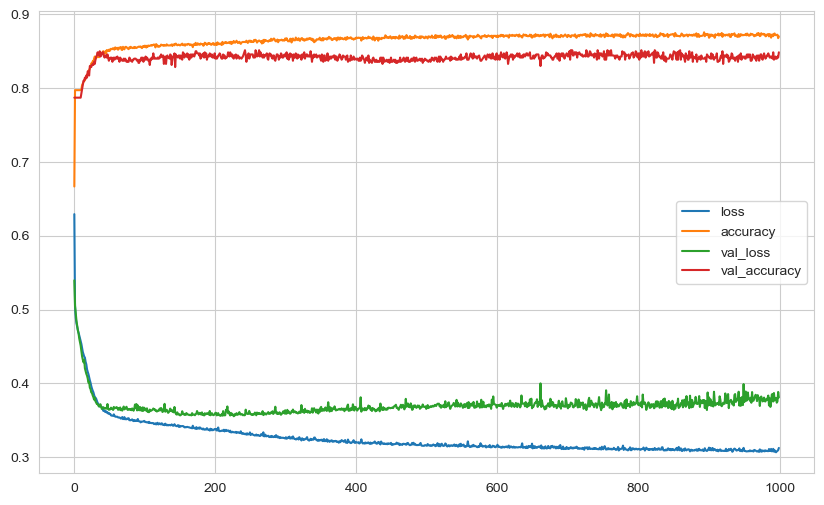

In [29]:
loss_df.plot()
plt.show()

In [30]:
model.evaluate(X_test, y_test, verbose=0)

[0.3437935411930084, 0.8616666793823242]

In [31]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3437935411930084
accuracy :  0.8616666793823242


In [32]:
y_pred = model.predict(X_test) > 0.5  
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[2289  100]
 [ 315  296]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.75      0.48      0.59       611

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [33]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [34]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279153211338356, 1: 2.4544179523141656}

In [35]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          class_weight=class_weights)

Epoch 1/1000
50/50 [==============================] - 1s 6ms/step - loss: 0.6855 - accuracy: 0.6879 - val_loss: 0.6876 - val_accuracy: 0.6814
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.6851 - val_loss: 0.6701 - val_accuracy: 0.6986
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.6838 - val_loss: 0.6377 - val_accuracy: 0.7243
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6383 - accuracy: 0.6829 - val_loss: 0.6241 - val_accuracy: 0.7000
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6256 - accuracy: 0.6749 - val_loss: 0.6219 - val_accuracy: 0.6843
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.6717 - val_loss: 0.6190 - val_accuracy: 0.6757
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.6667 - val_loss: 0.5663 - val_accuracy: 0.7186
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7794 - val_loss: 0.5316 - val_accuracy: 0.7229
Epoch 59/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.7790 - val_loss: 0.4398 - val_accuracy: 0.7943
Epoch 60/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.7789 - val_loss: 0.4504 - val_accuracy: 0.7914
Epoch 61/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7768 - val_loss: 0.4486 - val_accuracy: 0.7886
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7795 - val_loss: 0.4771 - val_accuracy: 0.7514
Epoch 63/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.7806 - val_loss: 0.4684 - val_accuracy: 0.7714
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7806 - val_loss: 0.4534 - val_accuracy: 0.7843
Epoch 65/1000

50/50 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.7906 - val_loss: 0.4667 - val_accuracy: 0.7729
Epoch 116/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7895 - val_loss: 0.4685 - val_accuracy: 0.7729
Epoch 117/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.7902 - val_loss: 0.4838 - val_accuracy: 0.7686
Epoch 118/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.7870 - val_loss: 0.4775 - val_accuracy: 0.7729
Epoch 119/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4594 - accuracy: 0.7822 - val_loss: 0.4724 - val_accuracy: 0.7743
Epoch 120/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.7886 - val_loss: 0.4362 - val_accuracy: 0.8000
Epoch 121/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4575 - accuracy: 0.7884 - val_loss: 0.4529 - val_accuracy: 0.7871
Epoch 1

Epoch 172/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7965 - val_loss: 0.4537 - val_accuracy: 0.7871
Epoch 173/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.7925 - val_loss: 0.4488 - val_accuracy: 0.7957
Epoch 174/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4537 - accuracy: 0.7957 - val_loss: 0.4368 - val_accuracy: 0.8014
Epoch 175/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.7924 - val_loss: 0.4100 - val_accuracy: 0.8200
Epoch 176/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.7933 - val_loss: 0.4173 - val_accuracy: 0.8157
Epoch 177/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.7927 - val_loss: 0.4455 - val_accuracy: 0.7943
Epoch 178/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4495 - accuracy: 0.7911 - val_loss: 0.4370 - val_accuracy:

Epoch 229/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.7943 - val_loss: 0.4289 - val_accuracy: 0.7957
Epoch 230/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.7984 - val_loss: 0.4461 - val_accuracy: 0.7800
Epoch 231/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.7957 - val_loss: 0.4843 - val_accuracy: 0.7657
Epoch 232/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.7908 - val_loss: 0.4522 - val_accuracy: 0.7857
Epoch 233/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.7994 - val_loss: 0.4663 - val_accuracy: 0.7614
Epoch 234/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.7892 - val_loss: 0.4396 - val_accuracy: 0.7971
Epoch 235/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.7948 - val_loss: 0.4341 - val_accuracy:

Epoch 286/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.7971 - val_loss: 0.4126 - val_accuracy: 0.8086
Epoch 287/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7973 - val_loss: 0.4053 - val_accuracy: 0.8171
Epoch 288/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.7941 - val_loss: 0.4275 - val_accuracy: 0.8029
Epoch 289/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4409 - accuracy: 0.8032 - val_loss: 0.4489 - val_accuracy: 0.7814
Epoch 290/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.7968 - val_loss: 0.4549 - val_accuracy: 0.7871
Epoch 291/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7944 - val_loss: 0.4800 - val_accuracy: 0.7629
Epoch 292/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.7970 - val_loss: 0.4642 - val_accuracy:

Epoch 343/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.8003 - val_loss: 0.4681 - val_accuracy: 0.7671
Epoch 344/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.7930 - val_loss: 0.4844 - val_accuracy: 0.7629
Epoch 345/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.7986 - val_loss: 0.5125 - val_accuracy: 0.7400
Epoch 346/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.7963 - val_loss: 0.4173 - val_accuracy: 0.7914
Epoch 347/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.7998 - val_loss: 0.4381 - val_accuracy: 0.7843
Epoch 348/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.7979 - val_loss: 0.4275 - val_accuracy: 0.7843
Epoch 349/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.8063 - val_loss: 0.4606 - val_accuracy:

Epoch 400/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.8048 - val_loss: 0.4487 - val_accuracy: 0.7814
Epoch 401/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.7995 - val_loss: 0.4811 - val_accuracy: 0.7671
Epoch 402/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.7957 - val_loss: 0.4401 - val_accuracy: 0.7886
Epoch 403/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4321 - accuracy: 0.7998 - val_loss: 0.4591 - val_accuracy: 0.7814
Epoch 404/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.8030 - val_loss: 0.4827 - val_accuracy: 0.7643
Epoch 405/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8041 - val_loss: 0.4667 - val_accuracy: 0.7714
Epoch 406/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8019 - val_loss: 0.4526 - val_accuracy:

Epoch 457/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8075 - val_loss: 0.5235 - val_accuracy: 0.7357
Epoch 458/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8075 - val_loss: 0.4938 - val_accuracy: 0.7586
Epoch 459/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.7987 - val_loss: 0.4412 - val_accuracy: 0.7757
Epoch 460/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.8059 - val_loss: 0.4509 - val_accuracy: 0.7786
Epoch 461/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8054 - val_loss: 0.4746 - val_accuracy: 0.7686
Epoch 462/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.8029 - val_loss: 0.4479 - val_accuracy: 0.7800
Epoch 463/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8008 - val_loss: 0.4762 - val_accuracy:

Epoch 514/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.8054 - val_loss: 0.4753 - val_accuracy: 0.7686
Epoch 515/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.8052 - val_loss: 0.4451 - val_accuracy: 0.7871
Epoch 516/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8044 - val_loss: 0.4764 - val_accuracy: 0.7629
Epoch 517/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8035 - val_loss: 0.4610 - val_accuracy: 0.7686
Epoch 518/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.8057 - val_loss: 0.4924 - val_accuracy: 0.7586
Epoch 519/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.8054 - val_loss: 0.4474 - val_accuracy: 0.7814
Epoch 520/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8011 - val_loss: 0.4063 - val_accuracy:

Epoch 571/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8013 - val_loss: 0.4458 - val_accuracy: 0.7871
Epoch 572/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.8100 - val_loss: 0.5025 - val_accuracy: 0.7543
Epoch 573/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8103 - val_loss: 0.4605 - val_accuracy: 0.7800
Epoch 574/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8097 - val_loss: 0.5041 - val_accuracy: 0.7529
Epoch 575/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.8035 - val_loss: 0.4617 - val_accuracy: 0.7700
Epoch 576/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8043 - val_loss: 0.4538 - val_accuracy: 0.7743
Epoch 577/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.7992 - val_loss: 0.4840 - val_accuracy:

Epoch 628/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8100 - val_loss: 0.4751 - val_accuracy: 0.7614
Epoch 629/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.7995 - val_loss: 0.4646 - val_accuracy: 0.7714
Epoch 630/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4253 - accuracy: 0.8094 - val_loss: 0.4660 - val_accuracy: 0.7700
Epoch 631/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.8089 - val_loss: 0.4525 - val_accuracy: 0.7786
Epoch 632/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.8030 - val_loss: 0.4502 - val_accuracy: 0.7814
Epoch 633/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.8083 - val_loss: 0.4536 - val_accuracy: 0.7829
Epoch 634/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.8102 - val_loss: 0.4374 - val_accuracy:

Epoch 685/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.8094 - val_loss: 0.4522 - val_accuracy: 0.7871
Epoch 686/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8024 - val_loss: 0.4389 - val_accuracy: 0.7871
Epoch 687/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8129 - val_loss: 0.4451 - val_accuracy: 0.7857
Epoch 688/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4216 - accuracy: 0.8102 - val_loss: 0.4785 - val_accuracy: 0.7686
Epoch 689/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.8092 - val_loss: 0.4404 - val_accuracy: 0.7871
Epoch 690/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8081 - val_loss: 0.5052 - val_accuracy: 0.7514
Epoch 691/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8092 - val_loss: 0.4583 - val_accuracy:

Epoch 742/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8068 - val_loss: 0.4233 - val_accuracy: 0.7929
Epoch 743/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8137 - val_loss: 0.4775 - val_accuracy: 0.7643
Epoch 744/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.8137 - val_loss: 0.4697 - val_accuracy: 0.7686
Epoch 745/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8095 - val_loss: 0.5024 - val_accuracy: 0.7571
Epoch 746/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8021 - val_loss: 0.4445 - val_accuracy: 0.7786
Epoch 747/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8159 - val_loss: 0.4495 - val_accuracy: 0.7857
Epoch 748/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8149 - val_loss: 0.4649 - val_accuracy:

Epoch 799/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8175 - val_loss: 0.4935 - val_accuracy: 0.7557
Epoch 800/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8098 - val_loss: 0.4577 - val_accuracy: 0.7857
Epoch 801/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8106 - val_loss: 0.4929 - val_accuracy: 0.7600
Epoch 802/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4208 - accuracy: 0.8094 - val_loss: 0.4823 - val_accuracy: 0.7571
Epoch 803/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8138 - val_loss: 0.4505 - val_accuracy: 0.7857
Epoch 804/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8127 - val_loss: 0.4206 - val_accuracy: 0.8029
Epoch 805/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8146 - val_loss: 0.4621 - val_accuracy:

Epoch 856/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4170 - accuracy: 0.8113 - val_loss: 0.4475 - val_accuracy: 0.7886
Epoch 857/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4166 - accuracy: 0.8119 - val_loss: 0.4875 - val_accuracy: 0.7614
Epoch 858/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8119 - val_loss: 0.4751 - val_accuracy: 0.7657
Epoch 859/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4164 - accuracy: 0.8148 - val_loss: 0.4316 - val_accuracy: 0.7929
Epoch 860/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.8159 - val_loss: 0.4760 - val_accuracy: 0.7700
Epoch 861/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4189 - accuracy: 0.8073 - val_loss: 0.4318 - val_accuracy: 0.7943
Epoch 862/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.8163 - val_loss: 0.4654 - val_accuracy:

Epoch 913/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8146 - val_loss: 0.4267 - val_accuracy: 0.7914
Epoch 914/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8178 - val_loss: 0.4655 - val_accuracy: 0.7729
Epoch 915/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8081 - val_loss: 0.4345 - val_accuracy: 0.7886
Epoch 916/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8117 - val_loss: 0.4773 - val_accuracy: 0.7671
Epoch 917/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8146 - val_loss: 0.4905 - val_accuracy: 0.7657
Epoch 918/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8152 - val_loss: 0.4806 - val_accuracy: 0.7600
Epoch 919/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8138 - val_loss: 0.4389 - val_accuracy:

Epoch 970/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8129 - val_loss: 0.5131 - val_accuracy: 0.7514
Epoch 971/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8076 - val_loss: 0.4588 - val_accuracy: 0.7700
Epoch 972/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8127 - val_loss: 0.4393 - val_accuracy: 0.7886
Epoch 973/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8127 - val_loss: 0.4424 - val_accuracy: 0.7886
Epoch 974/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8149 - val_loss: 0.4679 - val_accuracy: 0.7757
Epoch 975/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4124 - accuracy: 0.8162 - val_loss: 0.4436 - val_accuracy: 0.7871
Epoch 976/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8129 - val_loss: 0.5187 - val_accuracy:

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 18)                252       
                                                                 
 dense_5 (Dense)             (None, 9)                 171       
                                                                 
 dense_6 (Dense)             (None, 5)                 50        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 479
Trainable params: 479
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [37]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.685,0.688,0.688,0.681
1,0.669,0.685,0.670,0.699
2,0.654,0.684,0.638,0.724
3,0.638,0.683,0.624,0.700
4,0.626,0.675,0.622,0.684


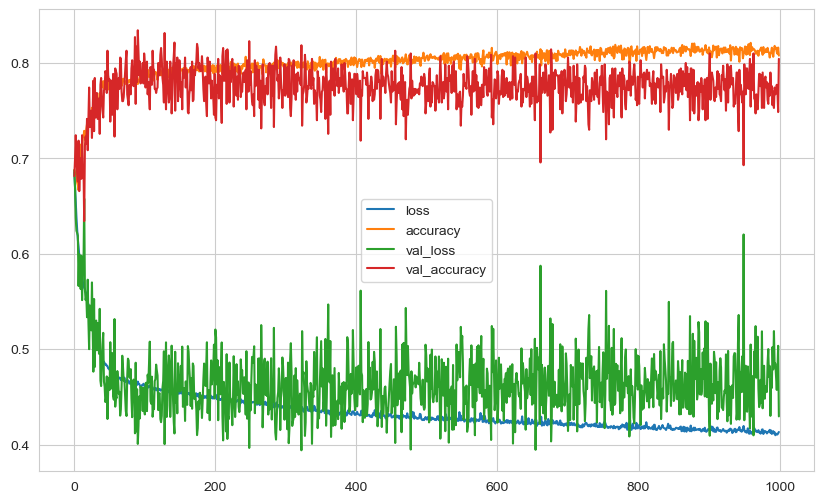

In [38]:
loss_df.plot()
plt.show()

In [39]:
model.evaluate(X_test, y_test, verbose=0)

[0.42351630330085754, 0.8143333196640015]

In [40]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.42351630330085754
accuracy :  0.8143333196640015


In [41]:
y_pred = model.predict(X_test) > 0.5  
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[2016  373]
 [ 184  427]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2389
           1       0.53      0.70      0.61       611

    accuracy                           0.81      3000
   macro avg       0.73      0.77      0.74      3000
weighted avg       0.84      0.81      0.82      3000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [42]:
from tensorflow.keras.optimizers import Adam

In [43]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [44]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          class_weight=class_weights)

Epoch 1/1000
50/50 [==============================] - 1s 6ms/step - loss: 0.6600 - accuracy: 0.6243 - val_loss: 0.6152 - val_accuracy: 0.7057
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.6649 - val_loss: 0.5734 - val_accuracy: 0.7314
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6070 - accuracy: 0.6727 - val_loss: 0.5754 - val_accuracy: 0.7071
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5824 - accuracy: 0.7005 - val_loss: 0.6209 - val_accuracy: 0.6643
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.7230 - val_loss: 0.5554 - val_accuracy: 0.7329
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5328 - accuracy: 0.7497 - val_loss: 0.5601 - val_accuracy: 0.7129
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5149 - accuracy: 0.7562 - val_loss: 0.4810 - val_accuracy: 0.7714
Epoch 

50/50 [==============================] - 0s 3ms/step - loss: 0.4523 - accuracy: 0.7876 - val_loss: 0.4671 - val_accuracy: 0.7586
Epoch 59/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4475 - accuracy: 0.8013 - val_loss: 0.4425 - val_accuracy: 0.7886
Epoch 60/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.7941 - val_loss: 0.4178 - val_accuracy: 0.8086
Epoch 61/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.7938 - val_loss: 0.4187 - val_accuracy: 0.8086
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.8017 - val_loss: 0.4601 - val_accuracy: 0.7700
Epoch 63/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.7944 - val_loss: 0.4323 - val_accuracy: 0.8000
Epoch 64/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4448 - accuracy: 0.7986 - val_loss: 0.4412 - val_accuracy: 0.7929
Epoch 65/1000

50/50 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8060 - val_loss: 0.4672 - val_accuracy: 0.7671
Epoch 116/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8010 - val_loss: 0.4557 - val_accuracy: 0.7729
Epoch 117/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.8073 - val_loss: 0.4769 - val_accuracy: 0.7600
Epoch 118/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.8105 - val_loss: 0.5553 - val_accuracy: 0.7100
Epoch 119/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4407 - accuracy: 0.7970 - val_loss: 0.4764 - val_accuracy: 0.7586
Epoch 120/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8081 - val_loss: 0.4721 - val_accuracy: 0.7643
Epoch 121/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.8037 - val_loss: 0.4360 - val_accuracy: 0.7929
Epoch 1

Epoch 172/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8090 - val_loss: 0.4673 - val_accuracy: 0.7643
Epoch 173/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.8076 - val_loss: 0.4663 - val_accuracy: 0.7729
Epoch 174/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.8086 - val_loss: 0.4767 - val_accuracy: 0.7629
Epoch 175/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8063 - val_loss: 0.4392 - val_accuracy: 0.7886
Epoch 176/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8068 - val_loss: 0.4813 - val_accuracy: 0.7629
Epoch 177/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.8035 - val_loss: 0.5231 - val_accuracy: 0.7314
Epoch 178/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8013 - val_loss: 0.4371 - val_accuracy:

Epoch 229/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.8060 - val_loss: 0.4503 - val_accuracy: 0.7829
Epoch 230/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.8083 - val_loss: 0.4787 - val_accuracy: 0.7657
Epoch 231/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8110 - val_loss: 0.4940 - val_accuracy: 0.7471
Epoch 232/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8070 - val_loss: 0.4605 - val_accuracy: 0.7757
Epoch 233/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4162 - accuracy: 0.8135 - val_loss: 0.5102 - val_accuracy: 0.7414
Epoch 234/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8021 - val_loss: 0.4602 - val_accuracy: 0.7800
Epoch 235/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8095 - val_loss: 0.4795 - val_accuracy:

Epoch 286/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8108 - val_loss: 0.4646 - val_accuracy: 0.7814
Epoch 287/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4136 - accuracy: 0.8083 - val_loss: 0.4432 - val_accuracy: 0.7971
Epoch 288/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8117 - val_loss: 0.4620 - val_accuracy: 0.7843
Epoch 289/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.8144 - val_loss: 0.4844 - val_accuracy: 0.7600
Epoch 290/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8114 - val_loss: 0.4822 - val_accuracy: 0.7600
Epoch 291/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8073 - val_loss: 0.4744 - val_accuracy: 0.7686
Epoch 292/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4136 - accuracy: 0.8086 - val_loss: 0.4658 - val_accuracy:

Epoch 343/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8127 - val_loss: 0.4965 - val_accuracy: 0.7500
Epoch 344/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.8129 - val_loss: 0.5279 - val_accuracy: 0.7329
Epoch 345/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8148 - val_loss: 0.5420 - val_accuracy: 0.7143
Epoch 346/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8081 - val_loss: 0.4732 - val_accuracy: 0.7786
Epoch 347/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.8135 - val_loss: 0.4815 - val_accuracy: 0.7714
Epoch 348/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8119 - val_loss: 0.4640 - val_accuracy: 0.7814
Epoch 349/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8151 - val_loss: 0.4934 - val_accuracy:

Epoch 400/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8160 - val_loss: 0.4919 - val_accuracy: 0.7586
Epoch 401/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4057 - accuracy: 0.8103 - val_loss: 0.4983 - val_accuracy: 0.7586
Epoch 402/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8141 - val_loss: 0.5202 - val_accuracy: 0.7443
Epoch 403/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8117 - val_loss: 0.4926 - val_accuracy: 0.7557
Epoch 404/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4037 - accuracy: 0.8143 - val_loss: 0.4866 - val_accuracy: 0.7700
Epoch 405/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8183 - val_loss: 0.5039 - val_accuracy: 0.7471
Epoch 406/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8129 - val_loss: 0.4912 - val_accuracy:

Epoch 457/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3983 - accuracy: 0.8205 - val_loss: 0.5889 - val_accuracy: 0.7171
Epoch 458/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8100 - val_loss: 0.5261 - val_accuracy: 0.7414
Epoch 459/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4037 - accuracy: 0.8103 - val_loss: 0.4539 - val_accuracy: 0.7814
Epoch 460/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8138 - val_loss: 0.5101 - val_accuracy: 0.7571
Epoch 461/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8163 - val_loss: 0.4711 - val_accuracy: 0.7843
Epoch 462/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 0.8163 - val_loss: 0.4744 - val_accuracy: 0.7757
Epoch 463/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4030 - accuracy: 0.8149 - val_loss: 0.5168 - val_accuracy:

Epoch 514/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3934 - accuracy: 0.8154 - val_loss: 0.5158 - val_accuracy: 0.7514
Epoch 515/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8149 - val_loss: 0.5020 - val_accuracy: 0.7643
Epoch 516/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.8181 - val_loss: 0.5438 - val_accuracy: 0.7257
Epoch 517/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8051 - val_loss: 0.5161 - val_accuracy: 0.7457
Epoch 518/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8163 - val_loss: 0.4903 - val_accuracy: 0.7800
Epoch 519/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3955 - accuracy: 0.8190 - val_loss: 0.5085 - val_accuracy: 0.7671
Epoch 520/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8141 - val_loss: 0.4970 - val_accuracy:

Epoch 571/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8148 - val_loss: 0.5115 - val_accuracy: 0.7571
Epoch 572/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3929 - accuracy: 0.8216 - val_loss: 0.5555 - val_accuracy: 0.7414
Epoch 573/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3954 - accuracy: 0.8152 - val_loss: 0.4978 - val_accuracy: 0.7700
Epoch 574/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8221 - val_loss: 0.5732 - val_accuracy: 0.7371
Epoch 575/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3917 - accuracy: 0.8171 - val_loss: 0.5177 - val_accuracy: 0.7600
Epoch 576/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8160 - val_loss: 0.5317 - val_accuracy: 0.7600
Epoch 577/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8106 - val_loss: 0.5145 - val_accuracy:

Epoch 628/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3910 - accuracy: 0.8189 - val_loss: 0.5479 - val_accuracy: 0.7429
Epoch 629/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8143 - val_loss: 0.5137 - val_accuracy: 0.7700
Epoch 630/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3920 - accuracy: 0.8184 - val_loss: 0.5307 - val_accuracy: 0.7629
Epoch 631/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8183 - val_loss: 0.5095 - val_accuracy: 0.7729
Epoch 632/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.8163 - val_loss: 0.5239 - val_accuracy: 0.7643
Epoch 633/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3885 - accuracy: 0.8224 - val_loss: 0.5313 - val_accuracy: 0.7486
Epoch 634/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8197 - val_loss: 0.5133 - val_accuracy:

Epoch 685/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3961 - accuracy: 0.8194 - val_loss: 0.5234 - val_accuracy: 0.7671
Epoch 686/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3996 - accuracy: 0.8111 - val_loss: 0.4854 - val_accuracy: 0.7871
Epoch 687/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3894 - accuracy: 0.8184 - val_loss: 0.5128 - val_accuracy: 0.7629
Epoch 688/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8244 - val_loss: 0.5458 - val_accuracy: 0.7429
Epoch 689/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8176 - val_loss: 0.5063 - val_accuracy: 0.7671
Epoch 690/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8206 - val_loss: 0.5430 - val_accuracy: 0.7543
Epoch 691/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8160 - val_loss: 0.5281 - val_accuracy:

Epoch 742/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8170 - val_loss: 0.5343 - val_accuracy: 0.7571
Epoch 743/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8225 - val_loss: 0.5509 - val_accuracy: 0.7429
Epoch 744/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3837 - accuracy: 0.8232 - val_loss: 0.5575 - val_accuracy: 0.7429
Epoch 745/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8157 - val_loss: 0.5405 - val_accuracy: 0.7557
Epoch 746/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3964 - accuracy: 0.8117 - val_loss: 0.5184 - val_accuracy: 0.7657
Epoch 747/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.8178 - val_loss: 0.5127 - val_accuracy: 0.7729
Epoch 748/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3903 - accuracy: 0.8200 - val_loss: 0.5205 - val_accuracy:

Epoch 799/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8240 - val_loss: 0.5411 - val_accuracy: 0.7500
Epoch 800/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.8148 - val_loss: 0.5293 - val_accuracy: 0.7586
Epoch 801/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3897 - accuracy: 0.8198 - val_loss: 0.5442 - val_accuracy: 0.7614
Epoch 802/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8222 - val_loss: 0.5621 - val_accuracy: 0.7429
Epoch 803/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8194 - val_loss: 0.5145 - val_accuracy: 0.7600
Epoch 804/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8152 - val_loss: 0.5313 - val_accuracy: 0.7614
Epoch 805/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.8233 - val_loss: 0.5599 - val_accuracy:

Epoch 856/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.8175 - val_loss: 0.5334 - val_accuracy: 0.7514
Epoch 857/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8232 - val_loss: 0.5997 - val_accuracy: 0.7186
Epoch 858/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3889 - accuracy: 0.8221 - val_loss: 0.5608 - val_accuracy: 0.7443
Epoch 859/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3800 - accuracy: 0.8203 - val_loss: 0.5029 - val_accuracy: 0.7829
Epoch 860/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8238 - val_loss: 0.5495 - val_accuracy: 0.7457
Epoch 861/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3831 - accuracy: 0.8176 - val_loss: 0.5205 - val_accuracy: 0.7800
Epoch 862/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.8227 - val_loss: 0.5224 - val_accuracy:

Epoch 913/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.8252 - val_loss: 0.5228 - val_accuracy: 0.7829
Epoch 914/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8213 - val_loss: 0.5153 - val_accuracy: 0.7786
Epoch 915/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8206 - val_loss: 0.4966 - val_accuracy: 0.8000
Epoch 916/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.8181 - val_loss: 0.5628 - val_accuracy: 0.7443
Epoch 917/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8254 - val_loss: 0.5904 - val_accuracy: 0.7443
Epoch 918/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.8214 - val_loss: 0.5617 - val_accuracy: 0.7500
Epoch 919/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.8244 - val_loss: 0.5322 - val_accuracy:

Epoch 970/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8252 - val_loss: 0.5868 - val_accuracy: 0.7471
Epoch 971/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.8137 - val_loss: 0.5305 - val_accuracy: 0.7743
Epoch 972/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8237 - val_loss: 0.5624 - val_accuracy: 0.7471
Epoch 973/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8170 - val_loss: 0.5637 - val_accuracy: 0.7600
Epoch 974/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3879 - accuracy: 0.8194 - val_loss: 0.5877 - val_accuracy: 0.7471
Epoch 975/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8221 - val_loss: 0.5351 - val_accuracy: 0.7757
Epoch 976/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3806 - accuracy: 0.8268 - val_loss: 0.5737 - val_accuracy:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.660,0.624,0.615,0.706
1,0.626,0.665,0.573,0.731
2,0.607,0.673,0.575,0.707
3,0.582,0.700,0.621,0.664
4,0.559,0.723,0.555,0.733


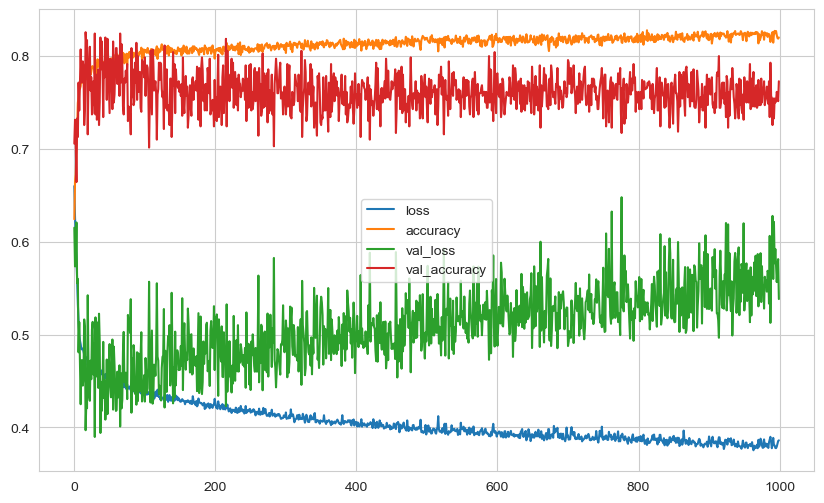

In [46]:
loss_df.plot()
plt.show()

In [47]:
model.evaluate(X_test, y_test, verbose=0)

[0.5006760358810425, 0.7853333353996277]

In [48]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5006760358810425
accuracy :  0.7853333353996277


In [49]:
y_pred = model.predict(X_test) > 0.5  
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[1912  477]
 [ 167  444]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2389
           1       0.48      0.73      0.58       611

    accuracy                           0.79      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.83      0.79      0.80      3000



### Add Dropout Layer

In [50]:
from tensorflow.keras.layers import Dropout

In [51]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(lr = 0.001) # default 
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [52]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          class_weight=class_weights)

Epoch 1/1000
50/50 [==============================] - 1s 6ms/step - loss: 0.7077 - accuracy: 0.6197 - val_loss: 0.6773 - val_accuracy: 0.7643
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.6730 - val_loss: 0.6786 - val_accuracy: 0.7786
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.6748 - val_loss: 0.6796 - val_accuracy: 0.7871
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.6954 - val_loss: 0.6812 - val_accuracy: 0.7857
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.6848 - val_loss: 0.6838 - val_accuracy: 0.7700
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.6962 - val_loss: 0.6833 - val_accuracy: 0.7671
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.6917 - val_loss: 0.6838 - val_accuracy: 0.7471
Epoch 

50/50 [==============================] - 0s 3ms/step - loss: 0.6180 - accuracy: 0.6744 - val_loss: 0.5766 - val_accuracy: 0.7157
Epoch 59/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.6446 - val_loss: 0.5681 - val_accuracy: 0.7371
Epoch 60/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6172 - accuracy: 0.6543 - val_loss: 0.5819 - val_accuracy: 0.7114
Epoch 61/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6279 - accuracy: 0.6602 - val_loss: 0.5564 - val_accuracy: 0.7586
Epoch 62/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.6883 - val_loss: 0.5594 - val_accuracy: 0.7443
Epoch 63/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.6735 - val_loss: 0.5664 - val_accuracy: 0.7429
Epoch 64/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6142 - accuracy: 0.6681 - val_loss: 0.5665 - val_accuracy: 0.7314
Epoch 65/1000

50/50 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.6963 - val_loss: 0.5439 - val_accuracy: 0.7457
Epoch 116/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5899 - accuracy: 0.6938 - val_loss: 0.5283 - val_accuracy: 0.7657
Epoch 117/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5914 - accuracy: 0.6857 - val_loss: 0.5323 - val_accuracy: 0.7643
Epoch 118/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.6911 - val_loss: 0.5224 - val_accuracy: 0.7786
Epoch 119/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5898 - accuracy: 0.6911 - val_loss: 0.5604 - val_accuracy: 0.7057
Epoch 120/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5811 - accuracy: 0.6746 - val_loss: 0.5052 - val_accuracy: 0.7700
Epoch 121/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.6840 - val_loss: 0.5446 - val_accuracy: 0.7414
Epoch 1

Epoch 172/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5954 - accuracy: 0.6814 - val_loss: 0.5445 - val_accuracy: 0.7286
Epoch 173/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.7054 - val_loss: 0.5115 - val_accuracy: 0.7686
Epoch 174/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.6921 - val_loss: 0.5328 - val_accuracy: 0.7329
Epoch 175/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.6870 - val_loss: 0.5143 - val_accuracy: 0.7671
Epoch 176/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5839 - accuracy: 0.6871 - val_loss: 0.5253 - val_accuracy: 0.7443
Epoch 177/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5723 - accuracy: 0.6878 - val_loss: 0.5219 - val_accuracy: 0.7500
Epoch 178/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5765 - accuracy: 0.6851 - val_loss: 0.5195 - val_accuracy:

Epoch 229/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5806 - accuracy: 0.6992 - val_loss: 0.5214 - val_accuracy: 0.7600
Epoch 230/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.6946 - val_loss: 0.5170 - val_accuracy: 0.7471
Epoch 231/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7002 - val_loss: 0.5035 - val_accuracy: 0.7629
Epoch 232/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.6814 - val_loss: 0.5345 - val_accuracy: 0.7371
Epoch 233/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.6857 - val_loss: 0.5037 - val_accuracy: 0.7629
Epoch 234/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.6911 - val_loss: 0.5149 - val_accuracy: 0.7443
Epoch 235/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.6913 - val_loss: 0.5019 - val_accuracy:

Epoch 286/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.7067 - val_loss: 0.5155 - val_accuracy: 0.7557
Epoch 287/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5834 - accuracy: 0.6794 - val_loss: 0.5258 - val_accuracy: 0.7400
Epoch 288/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.6925 - val_loss: 0.5150 - val_accuracy: 0.7500
Epoch 289/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.6857 - val_loss: 0.5140 - val_accuracy: 0.7571
Epoch 290/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5758 - accuracy: 0.7062 - val_loss: 0.5086 - val_accuracy: 0.7657
Epoch 291/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.6894 - val_loss: 0.5082 - val_accuracy: 0.7714
Epoch 292/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.7048 - val_loss: 0.5118 - val_accuracy:

Epoch 343/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.6781 - val_loss: 0.5036 - val_accuracy: 0.7500
Epoch 344/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.6838 - val_loss: 0.5245 - val_accuracy: 0.7286
Epoch 345/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.6910 - val_loss: 0.4980 - val_accuracy: 0.7629
Epoch 346/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5757 - accuracy: 0.6725 - val_loss: 0.5064 - val_accuracy: 0.7600
Epoch 347/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.6940 - val_loss: 0.5022 - val_accuracy: 0.7529
Epoch 348/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.6806 - val_loss: 0.5007 - val_accuracy: 0.7529
Epoch 349/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.6867 - val_loss: 0.5042 - val_accuracy:

Epoch 400/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5662 - accuracy: 0.6900 - val_loss: 0.5100 - val_accuracy: 0.7429
Epoch 401/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.6883 - val_loss: 0.5057 - val_accuracy: 0.7514
Epoch 402/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.6927 - val_loss: 0.5025 - val_accuracy: 0.7643
Epoch 403/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5680 - accuracy: 0.6894 - val_loss: 0.5095 - val_accuracy: 0.7429
Epoch 404/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.6802 - val_loss: 0.5072 - val_accuracy: 0.7457
Epoch 405/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5827 - accuracy: 0.6652 - val_loss: 0.5127 - val_accuracy: 0.7500
Epoch 406/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.6775 - val_loss: 0.5063 - val_accuracy:

Epoch 457/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.6957 - val_loss: 0.4984 - val_accuracy: 0.7729
Epoch 458/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.6900 - val_loss: 0.5180 - val_accuracy: 0.7557
Epoch 459/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.6957 - val_loss: 0.4959 - val_accuracy: 0.7743
Epoch 460/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.6814 - val_loss: 0.5228 - val_accuracy: 0.7543
Epoch 461/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5647 - accuracy: 0.6900 - val_loss: 0.5124 - val_accuracy: 0.7429
Epoch 462/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.6689 - val_loss: 0.5004 - val_accuracy: 0.7486
Epoch 463/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5747 - accuracy: 0.6883 - val_loss: 0.4933 - val_accuracy:

Epoch 514/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.6587 - val_loss: 0.5045 - val_accuracy: 0.7557
Epoch 515/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.6837 - val_loss: 0.5019 - val_accuracy: 0.7671
Epoch 516/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.7005 - val_loss: 0.5116 - val_accuracy: 0.7486
Epoch 517/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.6592 - val_loss: 0.5172 - val_accuracy: 0.7500
Epoch 518/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.6890 - val_loss: 0.4953 - val_accuracy: 0.7571
Epoch 519/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.6900 - val_loss: 0.4941 - val_accuracy: 0.7600
Epoch 520/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5671 - accuracy: 0.6921 - val_loss: 0.5039 - val_accuracy:

Epoch 571/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.6694 - val_loss: 0.5170 - val_accuracy: 0.7557
Epoch 572/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.6895 - val_loss: 0.4991 - val_accuracy: 0.7629
Epoch 573/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5722 - accuracy: 0.6668 - val_loss: 0.5083 - val_accuracy: 0.7486
Epoch 574/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.6849 - val_loss: 0.5055 - val_accuracy: 0.7471
Epoch 575/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5804 - accuracy: 0.6746 - val_loss: 0.5169 - val_accuracy: 0.7529
Epoch 576/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5723 - accuracy: 0.6679 - val_loss: 0.5016 - val_accuracy: 0.7600
Epoch 577/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.6862 - val_loss: 0.4905 - val_accuracy:

Epoch 628/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5773 - accuracy: 0.6800 - val_loss: 0.5061 - val_accuracy: 0.7571
Epoch 629/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5686 - accuracy: 0.6587 - val_loss: 0.4989 - val_accuracy: 0.7557
Epoch 630/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.6737 - val_loss: 0.5023 - val_accuracy: 0.7657
Epoch 631/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.6810 - val_loss: 0.4977 - val_accuracy: 0.7700
Epoch 632/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5716 - accuracy: 0.6702 - val_loss: 0.5010 - val_accuracy: 0.7629
Epoch 633/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.6768 - val_loss: 0.5172 - val_accuracy: 0.7486
Epoch 634/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.6710 - val_loss: 0.5068 - val_accuracy:

Epoch 685/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5608 - accuracy: 0.6687 - val_loss: 0.4959 - val_accuracy: 0.7500
Epoch 686/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5720 - accuracy: 0.6787 - val_loss: 0.4991 - val_accuracy: 0.7543
Epoch 687/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.6749 - val_loss: 0.5019 - val_accuracy: 0.7557
Epoch 688/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.6624 - val_loss: 0.4935 - val_accuracy: 0.7543
Epoch 689/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.6463 - val_loss: 0.5033 - val_accuracy: 0.7100
Epoch 690/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5668 - accuracy: 0.6624 - val_loss: 0.5173 - val_accuracy: 0.6886
Epoch 691/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.6433 - val_loss: 0.5058 - val_accuracy:

Epoch 742/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5656 - accuracy: 0.6476 - val_loss: 0.4946 - val_accuracy: 0.7200
Epoch 743/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5794 - accuracy: 0.6443 - val_loss: 0.5034 - val_accuracy: 0.7143
Epoch 744/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5632 - accuracy: 0.6529 - val_loss: 0.4985 - val_accuracy: 0.7143
Epoch 745/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.6506 - val_loss: 0.5177 - val_accuracy: 0.6957
Epoch 746/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5872 - accuracy: 0.6290 - val_loss: 0.5063 - val_accuracy: 0.7100
Epoch 747/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.6616 - val_loss: 0.4857 - val_accuracy: 0.7800
Epoch 748/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.6735 - val_loss: 0.4884 - val_accuracy:

Epoch 799/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5686 - accuracy: 0.6627 - val_loss: 0.4943 - val_accuracy: 0.7186
Epoch 800/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5644 - accuracy: 0.6581 - val_loss: 0.4993 - val_accuracy: 0.7157
Epoch 801/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.6617 - val_loss: 0.4939 - val_accuracy: 0.7143
Epoch 802/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.6548 - val_loss: 0.4998 - val_accuracy: 0.7143
Epoch 803/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.6675 - val_loss: 0.5045 - val_accuracy: 0.7100
Epoch 804/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5740 - accuracy: 0.6573 - val_loss: 0.4970 - val_accuracy: 0.7186
Epoch 805/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5680 - accuracy: 0.6502 - val_loss: 0.5062 - val_accuracy:

Epoch 856/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5745 - accuracy: 0.6522 - val_loss: 0.5142 - val_accuracy: 0.7057
Epoch 857/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.6600 - val_loss: 0.4995 - val_accuracy: 0.7686
Epoch 858/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5701 - accuracy: 0.6741 - val_loss: 0.4945 - val_accuracy: 0.7686
Epoch 859/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.6690 - val_loss: 0.4992 - val_accuracy: 0.7643
Epoch 860/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.6865 - val_loss: 0.4987 - val_accuracy: 0.7671
Epoch 861/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.6905 - val_loss: 0.4924 - val_accuracy: 0.7657
Epoch 862/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.6881 - val_loss: 0.5068 - val_accuracy:

Epoch 913/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.6690 - val_loss: 0.4975 - val_accuracy: 0.7100
Epoch 914/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.6622 - val_loss: 0.5131 - val_accuracy: 0.6957
Epoch 915/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5618 - accuracy: 0.6576 - val_loss: 0.4938 - val_accuracy: 0.7114
Epoch 916/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.6668 - val_loss: 0.5051 - val_accuracy: 0.7000
Epoch 917/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.6543 - val_loss: 0.4946 - val_accuracy: 0.7314
Epoch 918/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5657 - accuracy: 0.6648 - val_loss: 0.5035 - val_accuracy: 0.7043
Epoch 919/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5731 - accuracy: 0.6587 - val_loss: 0.5022 - val_accuracy:

Epoch 970/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.6821 - val_loss: 0.4949 - val_accuracy: 0.7786
Epoch 971/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.6756 - val_loss: 0.4991 - val_accuracy: 0.7771
Epoch 972/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.6690 - val_loss: 0.4989 - val_accuracy: 0.7257
Epoch 973/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.6563 - val_loss: 0.5015 - val_accuracy: 0.7186
Epoch 974/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.6694 - val_loss: 0.5169 - val_accuracy: 0.6986
Epoch 975/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.6476 - val_loss: 0.5093 - val_accuracy: 0.7086
Epoch 976/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5630 - accuracy: 0.6560 - val_loss: 0.5063 - val_accuracy:

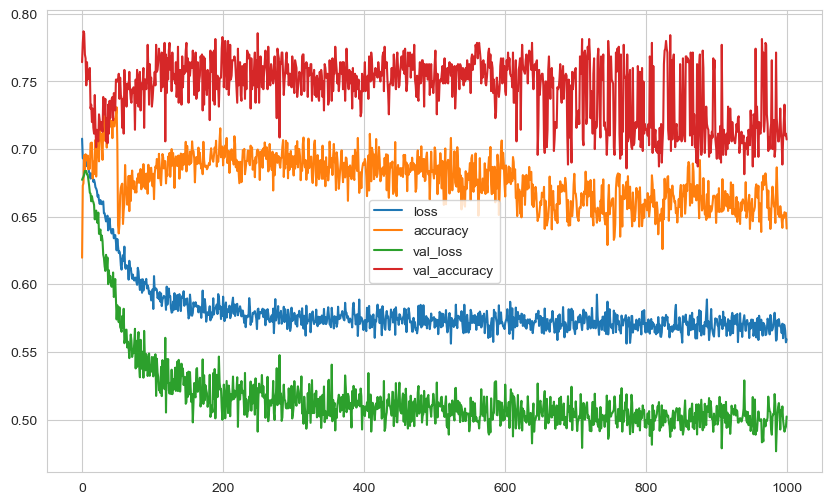

In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [54]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5023720860481262
accuracy :  0.7213333249092102


In [55]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[1637  752]
 [  84  527]]
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      2389
           1       0.41      0.86      0.56       611

    accuracy                           0.72      3000
   macro avg       0.68      0.77      0.68      3000
weighted avg       0.84      0.72      0.75      3000



### Add Early Stop

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [57]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [58]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 100, restore_best_weights = True)

In [59]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
50/50 [==============================] - 1s 6ms/step - loss: 0.5959 - accuracy: 0.7973 - val_loss: 0.5213 - val_accuracy: 0.7871
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4895 - accuracy: 0.7973 - val_loss: 0.4842 - val_accuracy: 0.7871
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7973 - val_loss: 0.4754 - val_accuracy: 0.7871
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.7973 - val_loss: 0.4690 - val_accuracy: 0.7871
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7973 - val_loss: 0.4641 - val_accuracy: 0.7871
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4631 - accuracy: 0.7973 - val_loss: 0.4604 - val_accuracy: 0.7871
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7973 - val_loss: 0.4569 - val_accuracy: 0.7871
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8590 - val_loss: 0.3689 - val_accuracy: 0.8357
Epoch 59/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8614 - val_loss: 0.3697 - val_accuracy: 0.8343
Epoch 60/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8600 - val_loss: 0.3691 - val_accuracy: 0.8414
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8602 - val_loss: 0.3712 - val_accuracy: 0.8357
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8597 - val_loss: 0.3670 - val_accuracy: 0.8414
Epoch 63/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8617 - val_loss: 0.3670 - val_accuracy: 0.8414
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8610 - val_loss: 0.3705 - val_accuracy: 0.8386
Epoch 65/1000

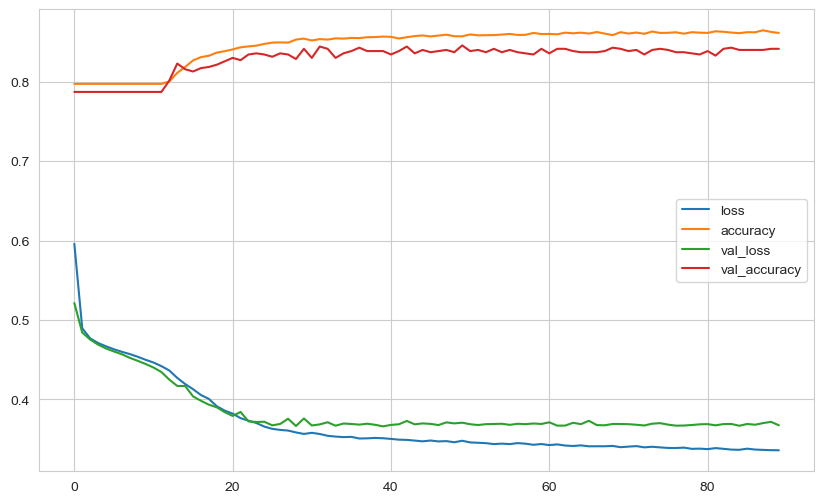

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [61]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3390464782714844
accuracy :  0.8629999756813049


In [62]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[2292   97]
 [ 314  297]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.75      0.49      0.59       611

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



#### Monitor the "val_recall" as metric

In [63]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [64]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=100,
                           restore_best_weights = True)

In [65]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
50/50 [==============================] - 1s 6ms/step - loss: 0.5437 - recall: 7.8309e-04 - val_loss: 0.5244 - val_recall: 0.0000e+00
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5021 - recall: 0.0000e+00 - val_loss: 0.5028 - val_recall: 0.0000e+00
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4873 - recall: 0.0000e+00 - val_loss: 0.4910 - val_recall: 0.0000e+00
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4786 - recall: 0.0000e+00 - val_loss: 0.4794 - val_recall: 0.0000e+00
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4731 - recall: 0.0000e+00 - val_loss: 0.4736 - val_recall: 0.0000e+00
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4682 - recall: 0.0000e+00 - val_loss: 0.4676 - val_recall: 0.0000e+00
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4647 - recall: 0.0000e+00 - val_loss: 0.4645 - v

50/50 [==============================] - 0s 3ms/step - loss: 0.3569 - recall: 0.4323 - val_loss: 0.3655 - val_recall: 0.3624
Epoch 60/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3556 - recall: 0.4315 - val_loss: 0.3628 - val_recall: 0.4228
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3547 - recall: 0.4221 - val_loss: 0.3635 - val_recall: 0.3691
Epoch 62/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3542 - recall: 0.4283 - val_loss: 0.3617 - val_recall: 0.3960
Epoch 63/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3539 - recall: 0.4283 - val_loss: 0.3615 - val_recall: 0.4161
Epoch 64/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3527 - recall: 0.4252 - val_loss: 0.3655 - val_recall: 0.3691
Epoch 65/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3527 - recall: 0.4260 - val_loss: 0.3619 - val_recall: 0.3826
Epoch 66/1000
50/50 [====================

Epoch 118/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3400 - recall: 0.4440 - val_loss: 0.3622 - val_recall: 0.4094
Epoch 119/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3417 - recall: 0.4612 - val_loss: 0.3634 - val_recall: 0.4362
Epoch 120/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3392 - recall: 0.4401 - val_loss: 0.3661 - val_recall: 0.3624
Epoch 121/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3398 - recall: 0.4495 - val_loss: 0.3656 - val_recall: 0.4765
Epoch 122/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3401 - recall: 0.4526 - val_loss: 0.3655 - val_recall: 0.3826
Epoch 123/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3398 - recall: 0.4401 - val_loss: 0.3660 - val_recall: 0.3960
Epoch 124/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3399 - recall: 0.4518 - val_loss: 0.3657 - val_recall: 0.3691
Epoch 125/1000
50/50

50/50 [==============================] - 0s 2ms/step - loss: 0.3348 - recall: 0.4597 - val_loss: 0.3672 - val_recall: 0.3960
Epoch 177/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3345 - recall: 0.4667 - val_loss: 0.3664 - val_recall: 0.3893
Epoch 178/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3333 - recall: 0.4738 - val_loss: 0.3666 - val_recall: 0.3758
Epoch 179/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3352 - recall: 0.4620 - val_loss: 0.3693 - val_recall: 0.3826
Epoch 180/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3344 - recall: 0.4667 - val_loss: 0.3662 - val_recall: 0.3893
Epoch 181/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3335 - recall: 0.4636 - val_loss: 0.3663 - val_recall: 0.3893
Epoch 182/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3335 - recall: 0.4691 - val_loss: 0.3675 - val_recall: 0.3758
Epoch 183/1000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.3309 - recall: 0.4902 - val_loss: 0.3706 - val_recall: 0.3826
Epoch 235/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3297 - recall: 0.4769 - val_loss: 0.3713 - val_recall: 0.3960
Epoch 236/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3298 - recall: 0.4714 - val_loss: 0.3712 - val_recall: 0.3893
Epoch 237/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3313 - recall: 0.4800 - val_loss: 0.3737 - val_recall: 0.4631
Epoch 238/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3299 - recall: 0.4722 - val_loss: 0.3705 - val_recall: 0.4228
Epoch 239/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3301 - recall: 0.4800 - val_loss: 0.3694 - val_recall: 0.3960
Epoch 240/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3292 - recall: 0.4761 - val_loss: 0.3706 - val_recall: 0.4228
Epoch 241/1000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.3263 - recall: 0.4792 - val_loss: 0.3700 - val_recall: 0.3960
Epoch 293/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3261 - recall: 0.4785 - val_loss: 0.3712 - val_recall: 0.3691
Epoch 294/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3263 - recall: 0.4855 - val_loss: 0.3694 - val_recall: 0.3758
Epoch 295/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3261 - recall: 0.4745 - val_loss: 0.3680 - val_recall: 0.3826
Epoch 296/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3262 - recall: 0.4816 - val_loss: 0.3713 - val_recall: 0.4698
Epoch 297/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3275 - recall: 0.4800 - val_loss: 0.3727 - val_recall: 0.4362
Epoch 298/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3268 - recall: 0.4933 - val_loss: 0.3703 - val_recall: 0.3960
Epoch 299/1000
50/50 [=============

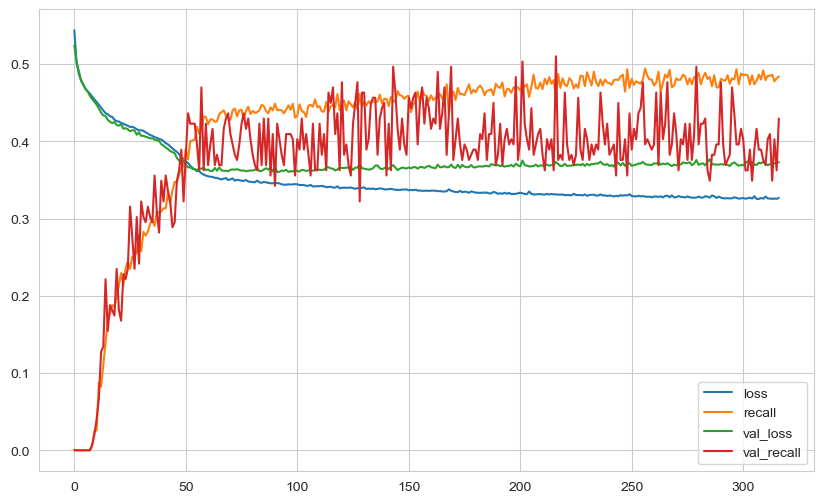

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [67]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.34433993697166443
accuracy :  0.5531914830207825


In [68]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[2221  168]
 [ 273  338]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2389
           1       0.67      0.55      0.61       611

    accuracy                           0.85      3000
   macro avg       0.78      0.74      0.76      3000
weighted avg       0.85      0.85      0.85      3000



## GridSearchCV

In [69]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [70]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 5, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [71]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [72]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003]}
grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Epoch 1/200
197/197 [==============================] - 1s 3ms/step - loss: 0.4760 - recall: 0.0102 - val_loss: 0.4537 - val_recall: 0.0134
Epoch 2/200
197/197 [==============================] - 0s 2ms/step - loss: 0.4508 - recall: 0.0587 - val_loss: 0.4311 - val_recall: 0.1477
Epoch 3/200
197/197 [==============================] - 0s 2ms/step - loss: 0.4353 - recall: 0.1707 - val_loss: 0.4256 - val_recall: 0.1141
Epoch 4/200
197/197 [==============================] - 0s 2ms/step - loss: 0.4255 - recall: 0.2177 - val_loss: 0.4233 - val_recall: 0.3691
Epoch 5/200
197/197 [==============================] - 0s 2ms/step - loss: 0.4175 - recall: 0.2600 - val_loss: 0.4125 - val_recall: 0.3020
Epoch 6/200
197/197 [==============================] - 0s 2ms/step - loss: 0.4111 - recall: 0.2811 - val_loss: 0.4406 - val_recall: 0.5436
Epoch 7/200
197/197 [==============================] - 0s 2ms/step - loss: 0.4080 - recall: 0.3148 - va

197/197 [==============================] - 0s 2ms/step - loss: 0.3323 - recall: 0.4628 - val_loss: 0.3549 - val_recall: 0.3826
Epoch 60/200
197/197 [==============================] - 0s 2ms/step - loss: 0.3324 - recall: 0.4675 - val_loss: 0.3492 - val_recall: 0.4362
Epoch 61/200
197/197 [==============================] - 0s 2ms/step - loss: 0.3319 - recall: 0.4652 - val_loss: 0.3496 - val_recall: 0.3893
Epoch 62/200
197/197 [==============================] - 0s 2ms/step - loss: 0.3314 - recall: 0.4652 - val_loss: 0.3538 - val_recall: 0.4094
Epoch 63/200
197/197 [==============================] - 0s 2ms/step - loss: 0.3326 - recall: 0.4644 - val_loss: 0.3510 - val_recall: 0.3691
Epoch 64/200
197/197 [==============================] - 0s 2ms/step - loss: 0.3327 - recall: 0.4652 - val_loss: 0.3481 - val_recall: 0.3758
Epoch 65/200
197/197 [==============================] - 0s 2ms/step - loss: 0.3325 - recall: 0.4573 - val_loss: 0.3561 - val_recall: 0.4161
Epoch 66/200
197/197 [===========

197/197 [==============================] - 0s 2ms/step - loss: 0.3267 - recall: 0.4675 - val_loss: 0.3472 - val_recall: 0.4027
Epoch 118/200
197/197 [==============================] - 0s 2ms/step - loss: 0.3271 - recall: 0.4714 - val_loss: 0.3424 - val_recall: 0.4631
Epoch 119/200
197/197 [==============================] - 0s 2ms/step - loss: 0.3248 - recall: 0.4691 - val_loss: 0.3459 - val_recall: 0.4161
Epoch 120/200
197/197 [==============================] - 0s 2ms/step - loss: 0.3270 - recall: 0.4777 - val_loss: 0.3348 - val_recall: 0.4027
Epoch 121/200
197/197 [==============================] - 0s 2ms/step - loss: 0.3256 - recall: 0.4628 - val_loss: 0.3480 - val_recall: 0.3893
Epoch 122/200
197/197 [==============================] - 0s 2ms/step - loss: 0.3253 - recall: 0.4832 - val_loss: 0.3508 - val_recall: 0.3557
Epoch 123/200
197/197 [==============================] - 0s 2ms/step - loss: 0.3260 - recall: 0.4753 - val_loss: 0.3330 - val_recall: 0.4631
Epoch 123: early stopping


GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002A025A65910>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64], 'learn_rate': [0.001, 0.003],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [73]:
grid_model.best_score_

0.5685667311143181

In [74]:
grid_model.best_params_ 

{'batch_size': 32,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [75]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
5,0.569,0.096,1,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
13,0.544,0.082,2,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
12,0.525,0.076,3,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
7,0.517,0.085,4,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
10,0.506,0.322,5,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
2,0.481,0.400,6,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
4,0.480,0.071,7,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
0,0.480,0.083,8,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
9,0.471,0.074,9,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
1,0.470,0.101,10,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."


In [76]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[2216  173]
 [ 246  365]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2389
           1       0.68      0.60      0.64       611

    accuracy                           0.86      3000
   macro avg       0.79      0.76      0.77      3000
weighted avg       0.85      0.86      0.86      3000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

94/94 [==============================] - 0s 1ms/step


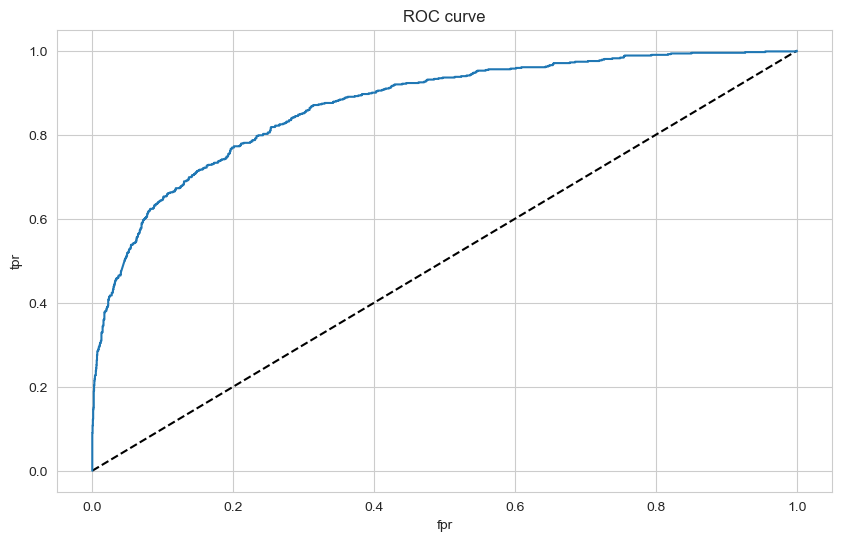

In [79]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [80]:
roc_auc_score(y_test, y_pred_proba)

0.8695353567462437

# Final Model and Model Deployment

In [136]:
import pickle

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state = seed)

In [107]:
cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [108]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [109]:
pickle.dump(column_trans, open("column_trans", 'wb'))

In [110]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = RMSprop(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [111]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [112]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1, class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/1000
219/219 [==============================] - 2s 4ms/step - loss: 0.6582 - recall: 0.5259 - val_loss: 0.5664 - val_recall: 0.5614
Epoch 2/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.6142 - recall: 0.6438 - val_loss: 0.6867 - val_recall: 0.8249
Epoch 3/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.5851 - recall: 0.7027 - val_loss: 0.5868 - val_recall: 0.7741
Epoch 4/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.5602 - recall: 0.7097 - val_loss: 0.4799 - val_recall: 0.6563
Epoch 5/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.5428 - recall: 0.7125 - val_loss: 0.5312 - val_recall: 0.7823
Epoch 6/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.5265 - recall: 0.7286 - val_loss: 0.5161 - val_recall: 0.7938
Epoch 7/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.5169 - recall: 0.7223 - val_loss: 0.4910 - val_recall: 0.7660
Epoch 8/1000
219/219

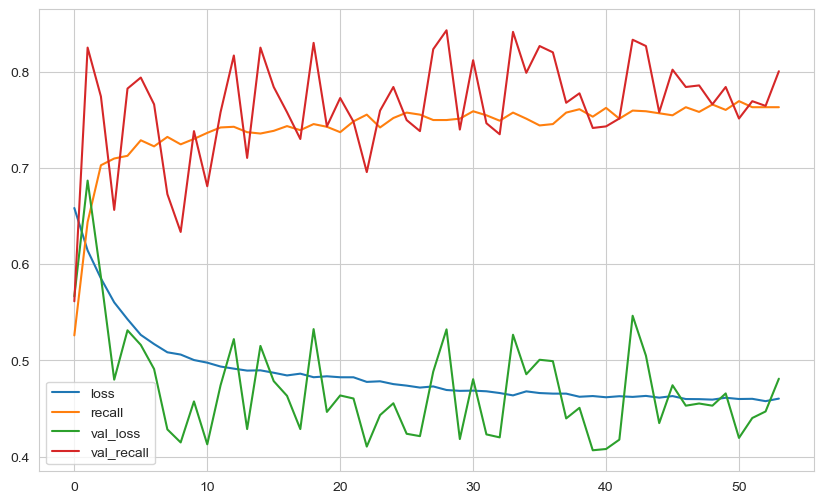

In [113]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [118]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5322012901306152
recall :  0.8428805470466614


In [119]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[1684  705]
 [  96  515]]
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      2389
           1       0.42      0.84      0.56       611

    accuracy                           0.73      3000
   macro avg       0.68      0.77      0.69      3000
weighted avg       0.84      0.73      0.76      3000



In [120]:
model.save('model_customer_churn.h5')

In [121]:
from tensorflow.keras.models import load_model

In [122]:
model_churn = load_model('model_customer_churn.h5')
transformer_churn = pickle.load(open("column_trans", "rb"))

## Prediction

In [147]:
single_customer = df.drop('Exited', axis = 1).iloc[12:13, :]
single_customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
12,476,France,Female,34,10,0.000,2,1,0,26260.980


In [149]:
df["Exited"].head(13)

0     1
1     0
2     1
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    0
Name: Exited, dtype: int64

In [150]:
single_customer = transformer_churn.transform(single_customer)
single_customer

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.252     , 0.21621622, 1.        , 0.        , 0.33333333,
        1.        , 0.        , 0.13125954]])

In [151]:
(model_churn.predict(single_customer) > 0.5).astype(int)

1/1 [==============================] - 0s 25ms/step


array([[0]])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___